# API Connectivity

In [65]:
#Importing Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Defining the URL for the Open-Meteo API with the parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 28.5355,              # Latitude for the location
    "longitude": 77.3910,             # Longitude for the location
    "current": "temperature_2m,wind_speed_10m",
    "hourly": "temperature_2m,relative_humidity_2m,wind_speed_10m"
}

In [67]:
# Making the GET request
response = requests.get(url, params=params)

In [68]:
# Parsing the JSON response
if response.status_code == 200:
    print("Data fetched succesfully!")

Data fetched succesfully!


In [69]:
data = response.json()
data

{'latitude': 28.5,
 'longitude': 77.375,
 'generationtime_ms': 0.08499622344970703,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 200.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature_2m': '°C',
  'wind_speed_10m': 'km/h'},
 'current': {'time': '2024-10-20T06:45',
  'interval': 900,
  'temperature_2m': 33.6,
  'wind_speed_10m': 8.2},
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2024-10-20T00:00',
   '2024-10-20T01:00',
   '2024-10-20T02:00',
   '2024-10-20T03:00',
   '2024-10-20T04:00',
   '2024-10-20T05:00',
   '2024-10-20T06:00',
   '2024-10-20T07:00',
   '2024-10-20T08:00',
   '2024-10-20T09:00',
   '2024-10-20T10:00',
   '2024-10-20T11:00',
   '2024-10-20T12:00',
   '2024-10-20T13:00',
   '2024-10-20T14:00',
   '2024-10-20T15:00',
   '2024-10-20T16:00',
   '2024-10-20T17:00',
   '2024-10-20T18:00',
   '2024

In [70]:
# Extracting hourly forecast data
hourly_data = {
        'time': data['hourly']['time'],
        'temperature_2m': data['hourly']['temperature_2m'],
        'wind_speed_10m': data['hourly']['wind_speed_10m'],
        'relative_humidity_2m': data['hourly']['relative_humidity_2m']
}

In [71]:
# Converting to pandas DataFrame
df = pd.DataFrame(hourly_data)

In [72]:
# Printing the DataFrame
print("Noida Weather Data")
df

Noida Weather Data


,time,temperature_2m,wind_speed_10m,relative_humidity_2m
0,2024-10-20T00:00,22.2,2.2,93
1,2024-10-20T01:00,21.8,3.2,96
2,2024-10-20T02:00,22.8,2.9,93
3,2024-10-20T03:00,25.6,5.0,82
4,2024-10-20T04:00,28.4,6.8,72
...,...,...,...,...
163,2024-10-26T19:00,21.6,4.9,64
164,2024-10-26T20:00,21.0,5.2,65
165,2024-10-26T21:00,20.4,5.0,67
166,2024-10-26T22:00,19.7,4.8,70


In [73]:
# Checking for null-values
df.isnull().sum()

time                    0
temperature_2m          0
wind_speed_10m          0
relative_humidity_2m    0
dtype: int64

In [74]:
X = df[['temperature_2m', 'wind_speed_10m']]  # Features
y = df['relative_humidity_2m']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred

array([70.51543313, 41.84710444, 82.19328048, 47.37254774, 79.35218874,
       69.73264677, 76.02110805, 68.45804232, 36.50597861, 49.9199275 ,
       62.23071534, 46.27536644, 53.34661408, 76.34746249, 73.9765913 ,
       56.00430293, 76.13648232, 55.66324528, 67.32730399, 50.15848494,
       71.08125958, 64.61537516, 41.86687283, 68.56743685, 44.53743575,
       33.78715545, 38.22322634, 77.85373006, 55.86135138, 44.10168678,
       72.45744967, 43.70638916, 60.37832495, 65.24233591, 75.05308965,
       68.51917662, 72.22578655, 80.14278399, 60.15953589, 30.87205535,
       73.47970804, 73.13865039])

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 115.55454336305858
R^2 Score: 0.6400678507489788


In [79]:
# Example: Predicting with temperature = 5 and wind speed = 7
X_new = [[25, 9]] # array with temperature and wind speed
y_pred = model.predict(X_new)

print("Predicted value:", y_pred)

Predicted value: [60.91059438]


<Axes: xlabel='temperature_2m', ylabel='wind_speed_10m'>

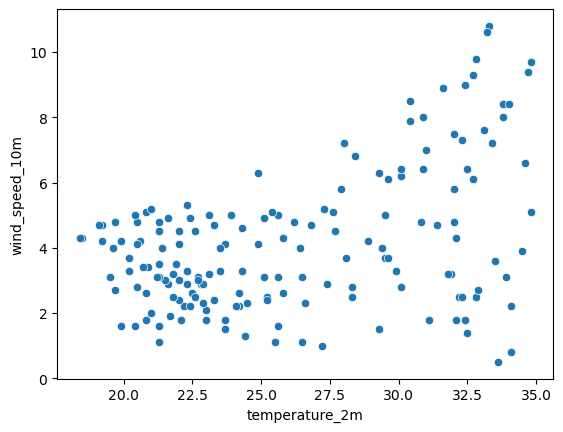

In [80]:
#Scatter Plot
sns.scatterplot(data=df, x='temperature_2m',
    y='wind_speed_10m',
    hue=None,
    size=None,)


<Axes: >

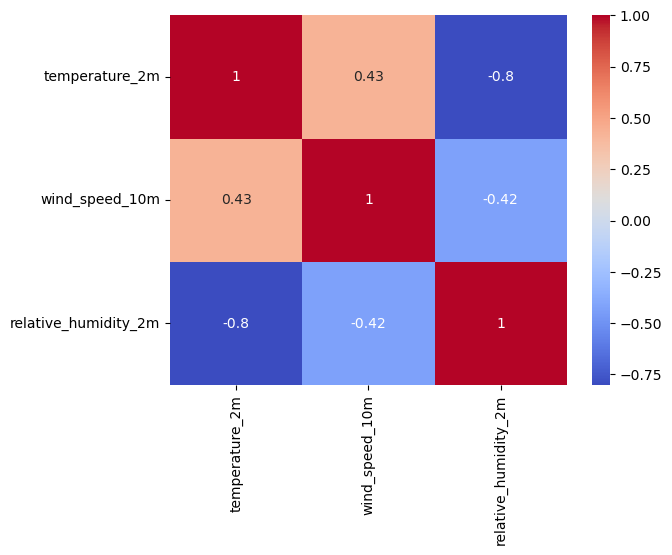

In [81]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')